<div style="text-align: center;">
  <img src="Images/Weather_Types.png" alt="Weather_Types Illustration" width="600"/>
</div>

## Hello!  

This is a project utilizing the **Weather-Type-Classification Database** to analyze and classify weather patterns. By exploring this dataset, we aim to build insights into weather characteristics and develop models for accurate weather classification based on the provided features.  

#### About the Dataset  
The dataset, available on [Kaggle](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification), contains synthetically generated weather data designed for classification tasks. It includes a wide range of weather-related variables, offering opportunities to practice data preprocessing, feature engineering, and outlier detection. 

#### Dataset Overview  
The dataset consists of **13,200 rows** and **11 columns**, structured as follows:  

1. **Temperature**: Temperature in degrees Celsius, ranging from extreme cold to extreme heat.  
2. **Humidity**: Humidity percentage, including values above 100% to introduce outliers.  
3. **Wind Speed**: Wind speed in kilometers per hour, including unrealistically high values.  
4. **Precipitation (%)**: Precipitation percentage, with some outlier values.  
5. **Cloud Cover**: Description of cloud cover (categorical).  
6. **Atmospheric Pressure**: Atmospheric pressure in hPa, covering a wide range.  
7. **UV Index**: Strength of ultraviolet radiation (numeric).  
8. **Season**: Season during which the data was recorded (categorical).  
9. **Visibility (km)**: Visibility in kilometers, with very low or very high values.  
10. **Location**: The type of location where the data was recorded (categorical).  
11. **Weather Type**: Target variable, classifying weather as Rainy, Sunny, Cloudy, or Snowy.  

#### Project Inspiration  
This project is inspired by the need to develop robust classification models for weather prediction. By leveraging the **Weather-Type-Classification Database**, we aim to identify key relationships among variables and improve the accuracy of weather categorization.  

#### Goals of the Project  
1. **Data Analysis**: Explore the dataset to uncover trends and patterns in weather features.  
2. **Classification Models**: Develop and evaluate machine learning models to classify weather types based on the provided features.  

This project will focus on utilizing the **Weather-Type-Classification Database** to provide valuable insights into weather data and enhance classification strategies for weather-related applications.

> ⚠️ *Note*: Although the data is synthetic, it serves as a useful proxy for learning data preprocessing, outlier detection, and classification modeling techniques.

# **Step 2: Exploratory Data Analysis (EDA) – Data Visualization**

This notebook focuses on the **visual exploration and analysis** of the Weather-Type-Classification Dataset. The goal is to understand the distribution of weather-related variables, uncover patterns, and examine relationships between features such as temperature, humidity, wind speed, and weather types to inform feature engineering and model development.

---

### Objectives of This Notebook

1. [Univariate Analysis: Distribution of Single Variables](#univariate-analysis)  
2. [Bivariate Analysis: Exploring Relationships Between Two Variables](#bivariate-analysis)  
3. [Data Encoding: Converting Categorical Variables](#data-encoding)  
4. [Multivariate Analysis: Examining Interactions Among Multiple Variables](#multivariate-analysis)  
5. [Summary and Key Insights](#summary)

---

### Next Steps

- Step 3: [EDA – SQL Queries](./03_eda_sql_queries.ipynb)  
- Step 4: [Modeling & Prediction](./04_modeling_prediction.ipynb)

## **2.1 Import Libraries and Load the Dataset**

We start by importing the necessary Python libraries and loading the dataset into a DataFrame.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a Python library that supports fast operations on large, multi-dimensional arrays and provides a wide range of mathematical functions.
import numpy as np

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Import display function to render DataFrames or outputs neatly in the notebook
from IPython.display import display

# OrdinalEncoder is used to convert ordered categorical values into numerical format for machine learning models
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Load the dataset
print("Previewing the raw dataset:")
df = pd.read_csv("weather_classification_cleaned.csv")
display(df.head())

Previewing the raw dataset:


,temperature,humidity,wind_speed,precipitation,cloud_cover,atm_pressure,uv_index,season,visibility,location,weather_type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


---

<a id="inspection"></a>

## **2.2 Initial Inspection**

We inspect the structure, data types, and basic info of the dataset.

In [3]:
# Display basic structure of the dataset
print("Dataset Info:")
display(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11944 entries, 0 to 11943
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    11944 non-null  float64
 1   humidity       11944 non-null  int64  
 2   wind_speed     11944 non-null  float64
 3   precipitation  11944 non-null  float64
 4   cloud_cover    11944 non-null  object 
 5   atm_pressure   11944 non-null  float64
 6   uv_index       11944 non-null  int64  
 7   season         11944 non-null  object 
 8   visibility     11944 non-null  float64
 9   location       11944 non-null  object 
 10  weather_type   11944 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.0+ MB


None

In [4]:
# Summary statistics for numerical columns
print("Numerical Summary:")
display(df.describe())

Numerical Summary:


,temperature,humidity,wind_speed,precipitation,atm_pressure,uv_index,visibility
count,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000
mean,18.119642,69.539685,9.844022,52.455626,1005.777150,3.680593,5.138731
std,15.210780,19.576576,6.893475,32.110388,13.291386,3.642811,2.842095
min,-25.000000,20.000000,0.000000,0.000000,950.170000,0.000000,0.000000
25%,4.000000,59.000000,5.000000,19.000000,995.387500,1.000000,3.000000
50%,21.000000,70.000000,9.000000,57.000000,1007.315000,2.000000,5.000000
75%,30.000000,84.000000,13.500000,81.000000,1016.062500,6.000000,7.125000
max,50.000000,109.000000,48.500000,109.000000,1049.560000,14.000000,20.000000


In [5]:
# Summary statistics for categorical columns
print("Categorical Summary:")
display(df.describe(include=[object]))

Categorical Summary:


,cloud_cover,season,location,weather_type
count,11944,11944,11944,11944
unique,4,4,3,4
top,overcast,Winter,inland,Snowy
freq,5700,5291,4411,3079


In [6]:
# Checking the shape of the dataset (rows, columns)
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

The dataset contains 11,944 rows and 11 columns.


In [7]:
# Getting the column for the dataframe
print(f"The dataset columns include:")
display(df.columns)

The dataset columns include:


Index(['temperature', 'humidity', 'wind_speed', 'precipitation', 'cloud_cover',
       'atm_pressure', 'uv_index', 'season', 'visibility', 'location',
       'weather_type'],
      dtype='object')

---

<a id="univariate-analysis"></a>

## **2.3 Univariate Analysis: Distribution of Single Variables**

We explore the distribution and frequency of individual variables to understand their characteristics and spot potential data quality issues.

In [8]:
# Grouping the Categorical Columns
columns = ['cloud_cover', 'location', 'season']

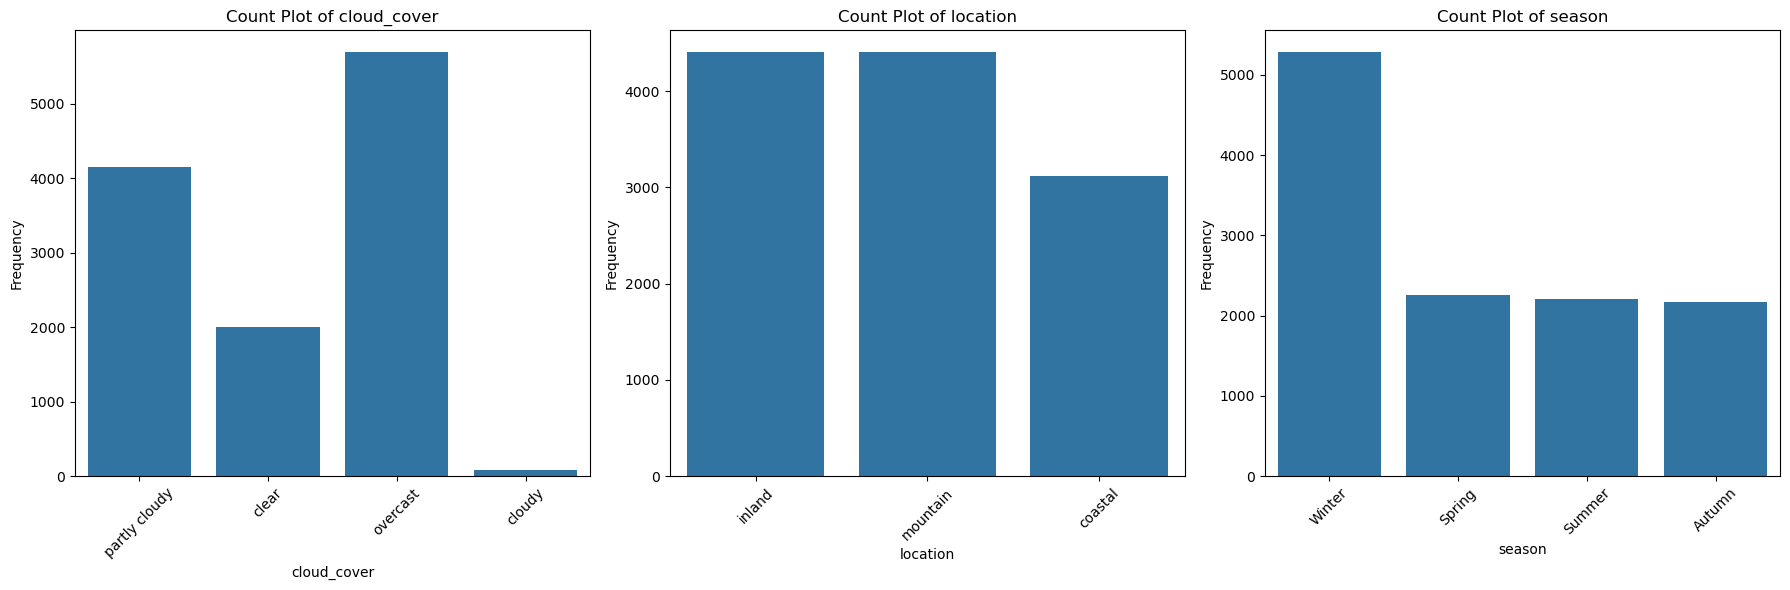

In [9]:
# Creating Countplots for Each of the variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes):
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Summary of the Plots for the Categorical Variables:

1. **Cloud Cover**:
Overcast skies are the most frequent, followed by partly cloudy conditions. Clear skies are less common, with cloudy conditions being rare.

2. **Location**:
Inland and mountainous regions have a similar frequency, while coastal areas have a lower frequency.

3. **Season**:
Winter is the most frequent season, significantly higher than Spring, Summer, and Autumn, which have similar occurrences.

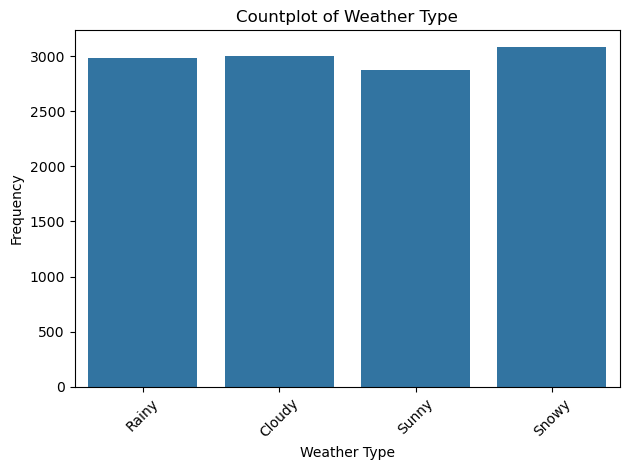

In [10]:
# Countplot for the Target variables
sns.countplot(x='weather_type', data=df)

plt.title('Countplot of Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Summary of the Plot on the Target:

The weather types (**Rainy**, **Cloudy**, **Sunny**, **Snowy**) are evenly distributed, with frequencies ranging between 3000 and 3200.

In [11]:
# Plot both a boxplot and a histogram (with KDE) for a numerical column.
def plot_numerical_distribution(column, color='blue'):

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot
    sns.boxplot(data=df, x=column, ax=axes[0], color=color)
    axes[0].set_title(f'Boxplot of {column}')

    # Histogram with KDE
    sns.histplot(data=df, x=column, bins=20, kde=True, color=color, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

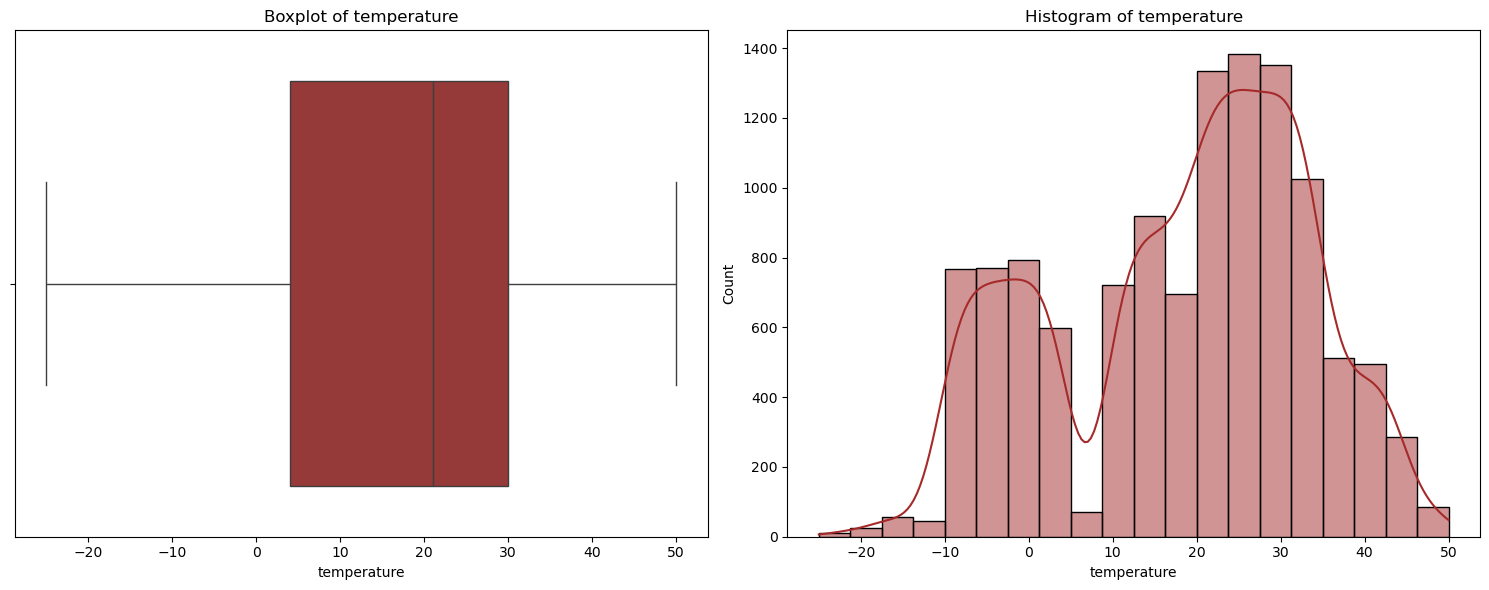

In [12]:
plot_numerical_distribution(column='temperature', color='brown')

#### Summary of the plots on **Temperature**:

1. **Boxplot**: 
The temperature values are symmetrically distributed with no significant outliers. The interquartile range (IQR) is centered around positive values, indicating a warmer dataset.

2. **Histogram**: 
The temperature data shows a multimodal distribution, with peaks around 10°C and 30°C. The data spans from approximately -20°C to 50°C.

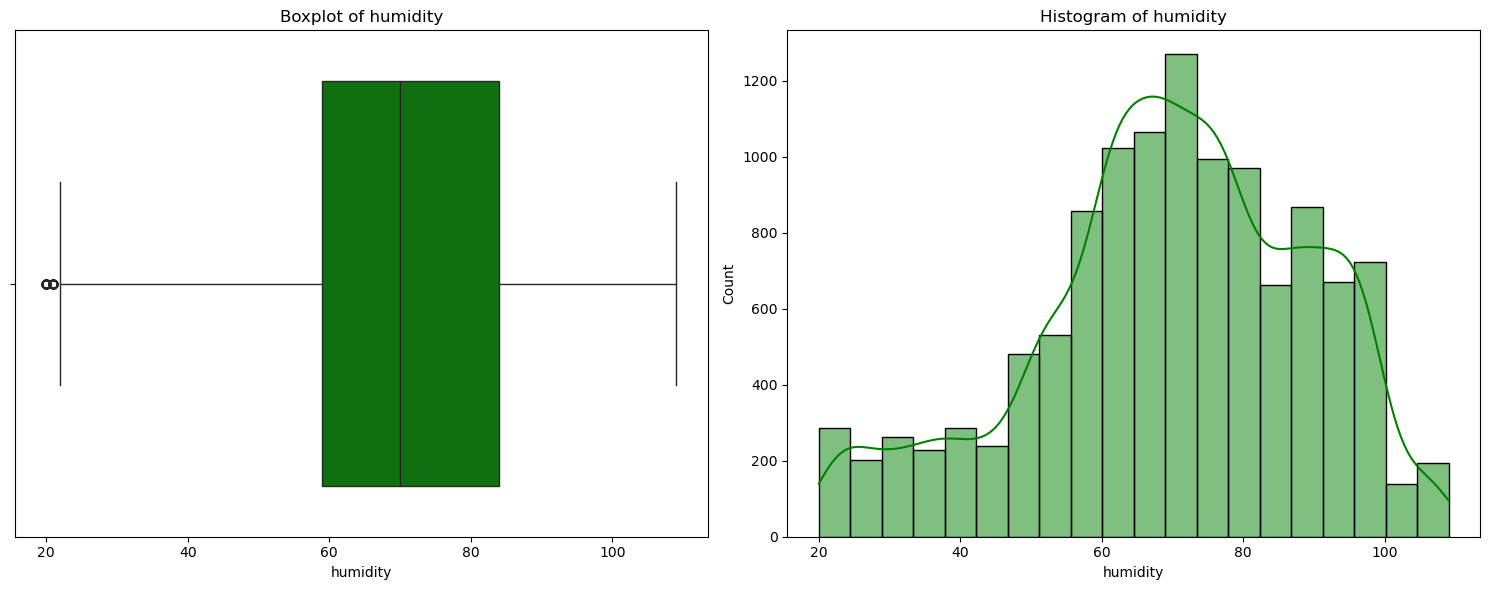

In [13]:
plot_numerical_distribution(column='humidity', color='green')

#### Summary of the plots on **Humidity**:

1. **Boxplot**: 
The majority of humidity values are concentrated between 60% and 80%. There are a few outliers on the lower side, below 20%.

2. **Histogram**: 
Humidity follows a bell-shaped distribution, slightly skewed to the left. Most values are clustered between 60% and 80%, with a gradual decline beyond these ranges.

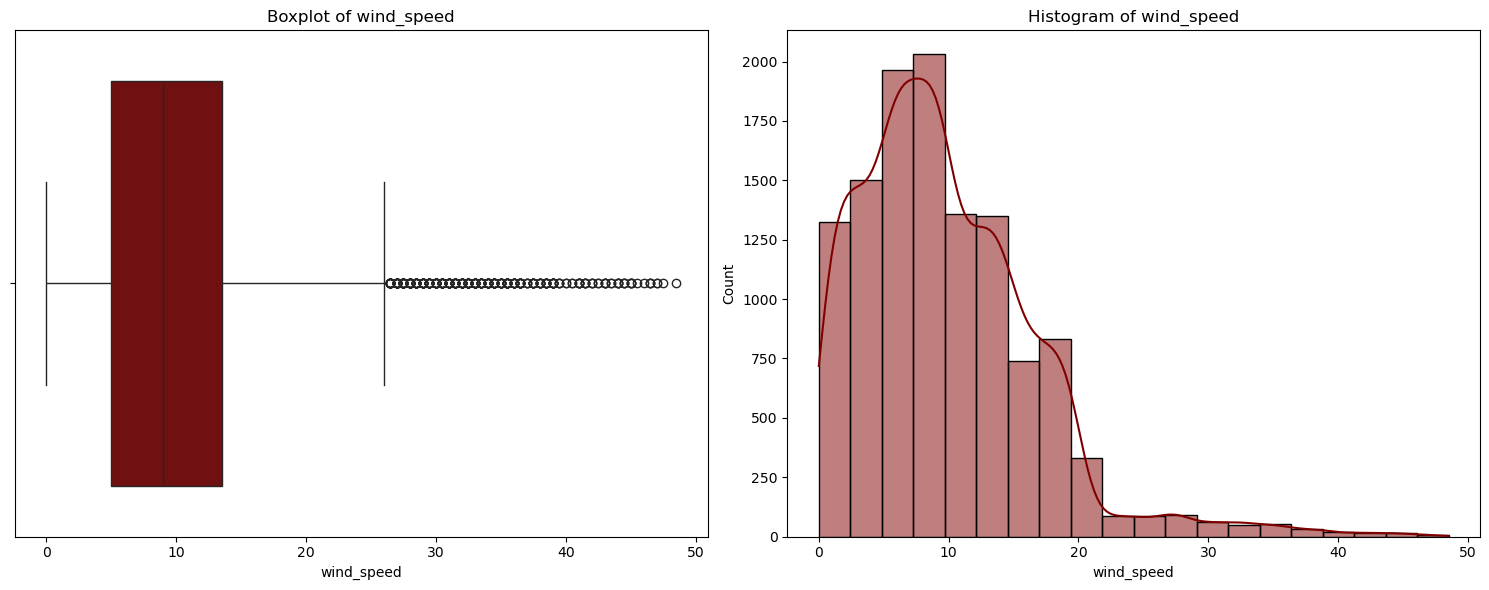

In [14]:
plot_numerical_distribution(column='wind_speed', color='maroon')

#### Summary of the plots on **Wind Speed**:

1. **Boxplot**: 
Wind speed data is right-skewed, with multiple high-value outliers above 20 units. The interquartile range (IQR) is between approximately 5 and 15 units.

2. **Histogram**: 
The wind speed distribution is unimodal but heavily right-skewed, with most values concentrated between 5 and 15 units and a long tail extending toward higher speeds.

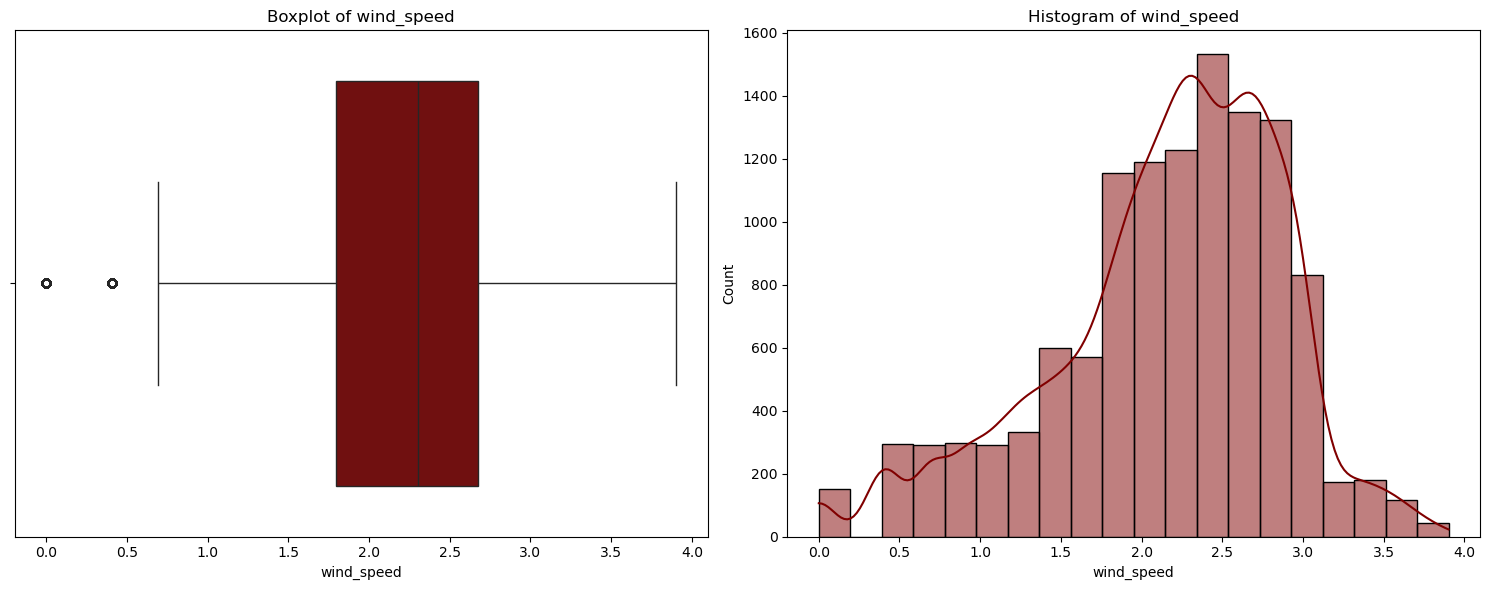

In [15]:
# Performing Log transformation on the Positively Skewed 'Wind Speed' column
df[['wind_speed']] = np.log(df[['wind_speed']] + 1)

plot_numerical_distribution(column='wind_speed', color='maroon')

#### Summary of the plots on **Log-Transformed Wind Speed**:

1. **Boxplot**: 
After log transformation, the data distribution is more symmetrical, with fewer extreme outliers. The IQR is between approximately 2.0 and 2.5 (log scale).

2. **Histogram**: 
The log-transformed wind speed shows a near-normal distribution, with the majority of values clustered around the center (approximately log 2.2). The transformation successfully mitigated the skewness of the original data.

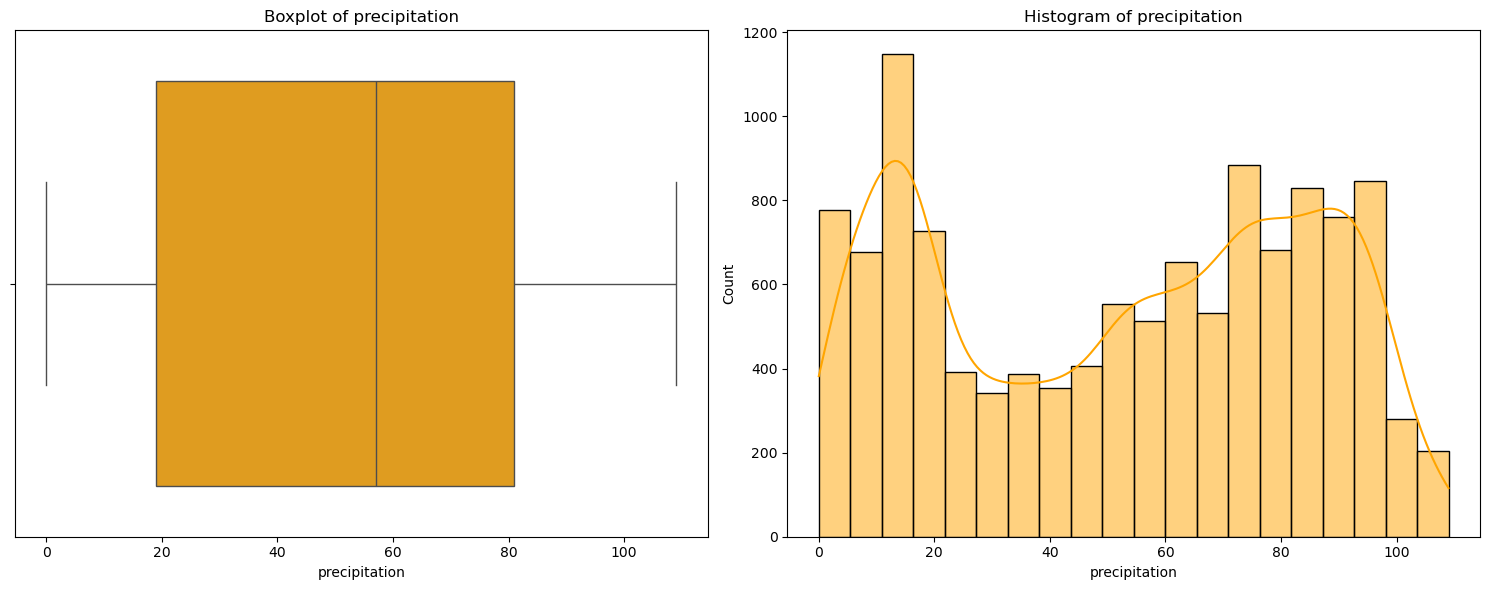

In [16]:
plot_numerical_distribution(column='precipitation', color='orange')

#### Summary of the plots on **Precipitation**:

1. **Boxplot**: 
The precipitation percentage is symmetrically distributed, with no significant outliers. Most of the data is between 25% and 75%, and the median lies at around 50%.

2. **Histogram**: 
Precipitation percentages show a bimodal distribution, with peaks around low and high values (near 20% and 80%).

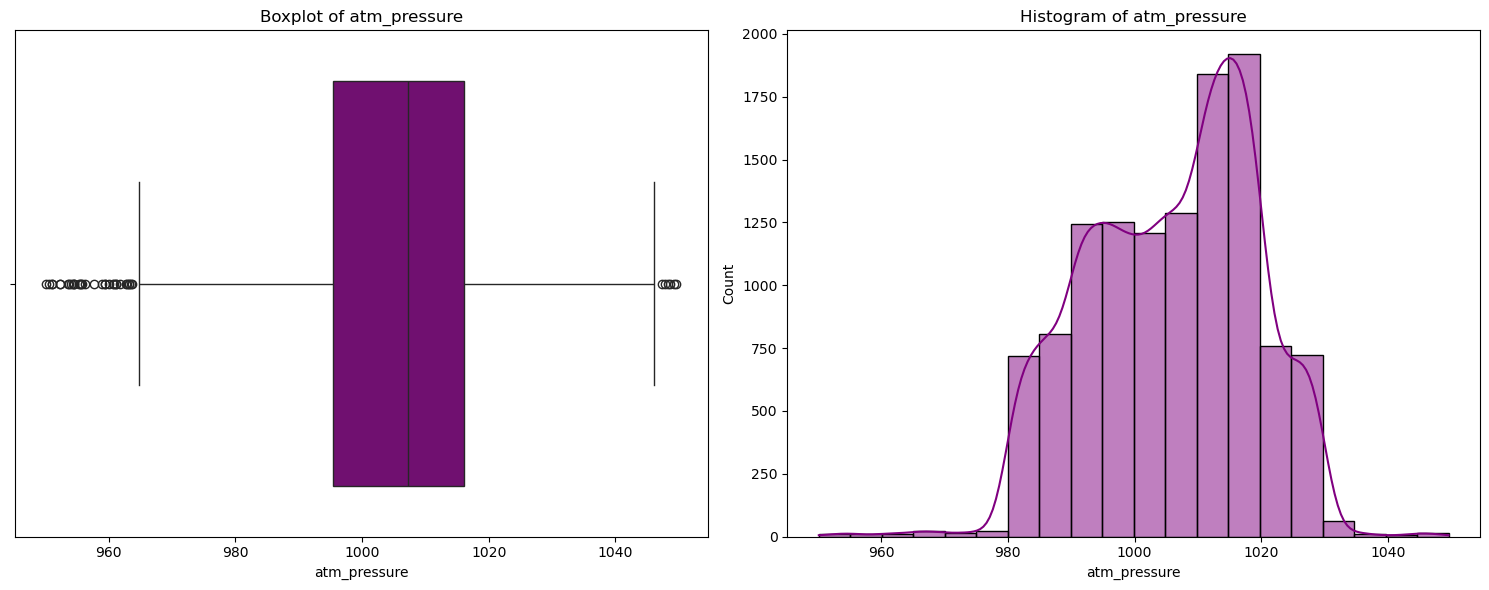

In [17]:
plot_numerical_distribution(column='atm_pressure', color='purple')

#### Summary of the plots on **Atmospheric Pressure**:

1. **Boxplot**: 
Atmospheric pressure has a narrow IQR, centered around 1000 hPa. There are several outliers on both lower and higher extremes.

2. **Histogram**: 
The data shows a unimodal, approximately normal distribution. Most values are centered around 1000 hPa, with fewer observations below 960 hPa and above 1040 hPa.

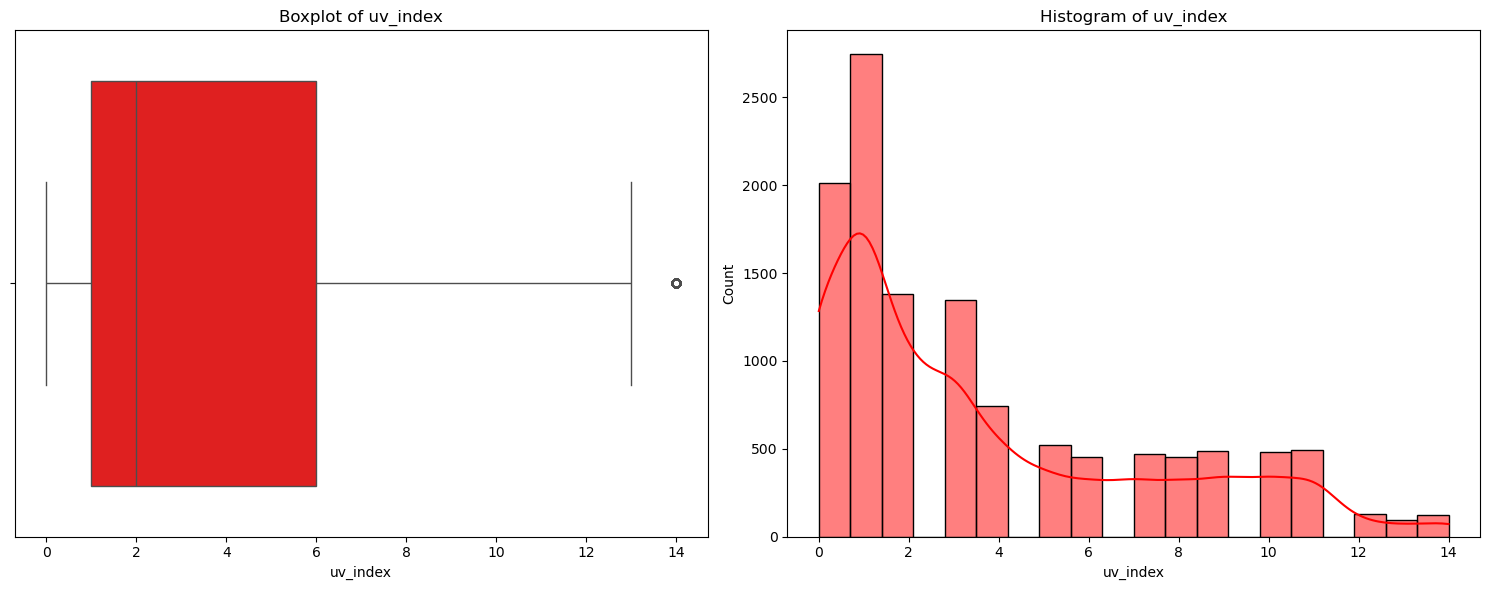

In [18]:
plot_numerical_distribution(column='uv_index', color='red')

#### Summary of the plots on **UV Index**:

1. **Boxplot**: 
The UV Index is heavily skewed towards lower values, with a few high-value outliers beyond 12.

2. **Histogram**: 
The UV Index has a right-skewed distribution, with a majority of data concentrated between 0 and 4. A sharp decline is observed for higher values.

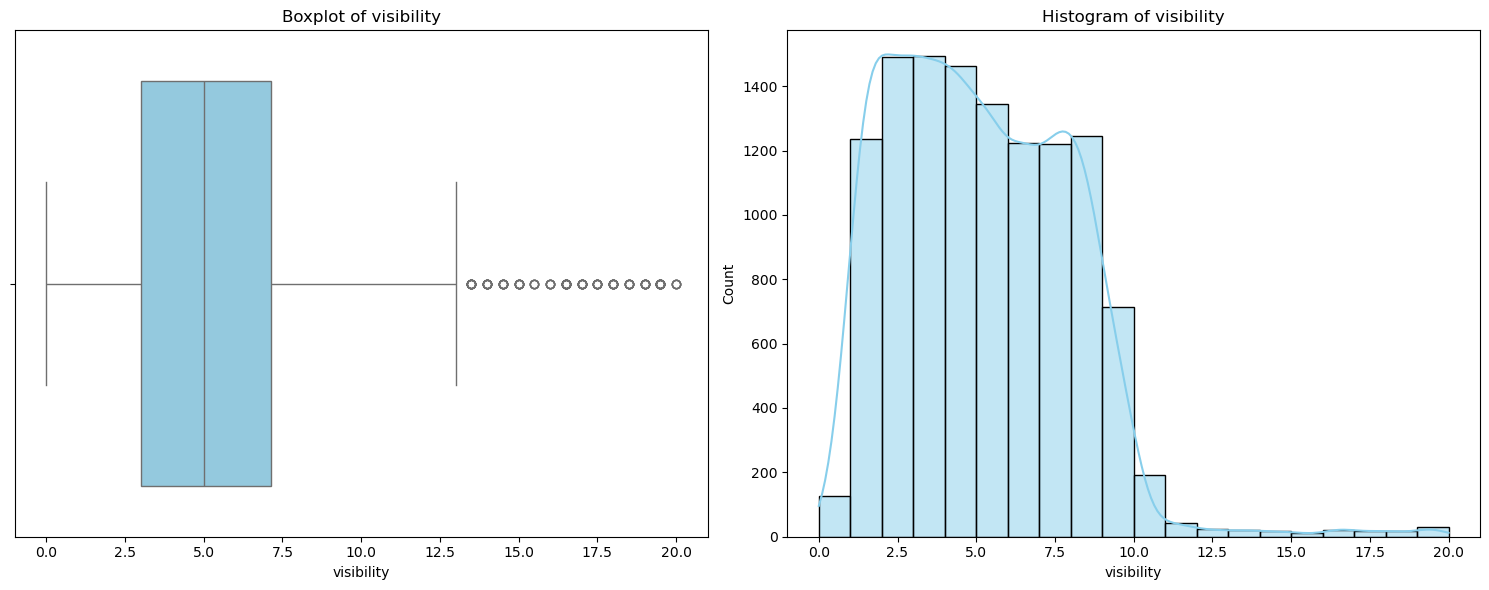

In [19]:
plot_numerical_distribution(column='visibility', color='skyblue')

#### Summary of the plots on **Visibility (km)**:

1. **Boxplot**:
   - Visibility data shows a moderately skewed distribution with several outliers above 12 km. 
   - The median visibility lies close to 5 km, with a narrow interquartile range.

2. **Histogram**:  
   - The histogram displays a right-skewed distribution, with the majority of visibility values clustered between 2 and 8 km.  
   - A long tail is observed for higher visibility values.

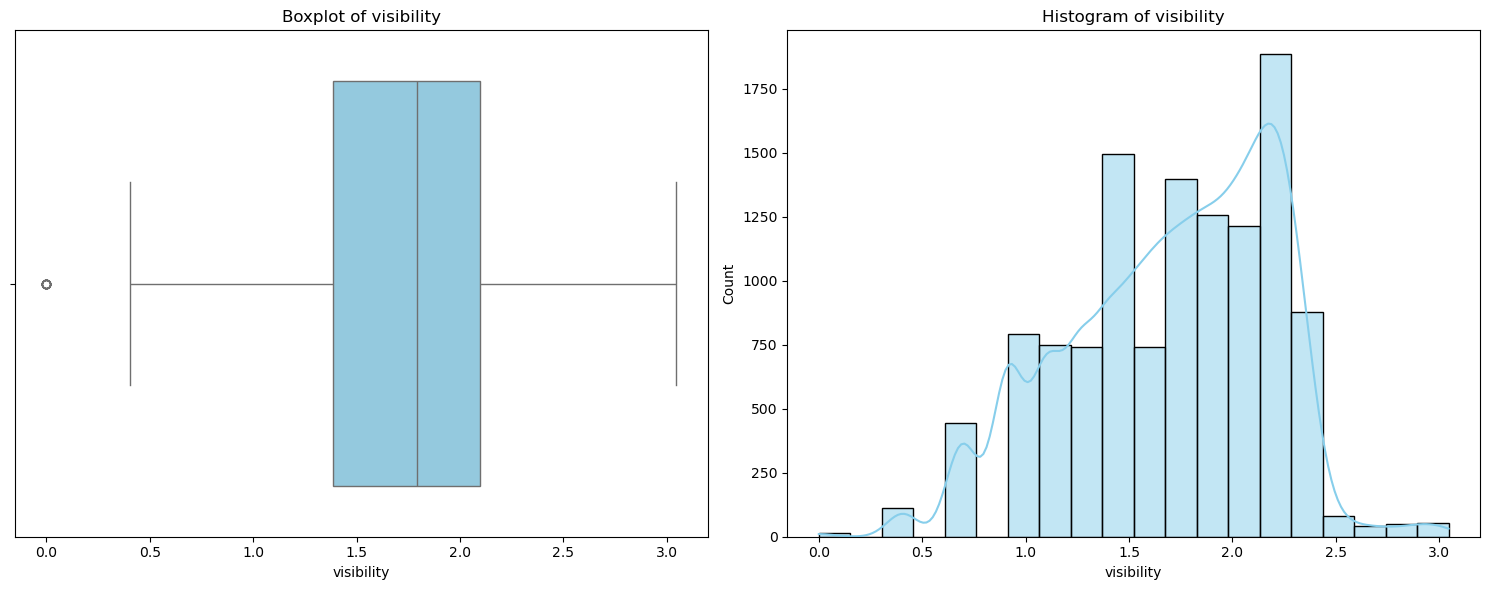

In [20]:
# Performing Log transformation on the Positively Skewed 'Visibility' column
df[['visibility']] = np.log(df[['visibility']] + 1)

plot_numerical_distribution(column='visibility', color='skyblue')

#### Summary of the plots on **Log-Transformed Visibility (km)**:

1. **Boxplot**:  
   - The log-transformed visibility shows improved symmetry compared to the raw data, with very few outliers (notably below 0.5).
   - The interquartile range and the median are well-centered, indicating the effectiveness of the transformation.

2. **Histogram**:  
   - The log-transformed histogram exhibits a roughly normal distribution, with a peak around 1.5–2.0 and fewer extreme values.
   - The transformation helps reduce the skewness present in the original data.

---

<a id="bivariate-analysis"></a>

## **2.4 Bivariate Analysis: Exploring Relationships Between Two Variables**

We analyze the relationships between pairs of variables, helping us identify correlations and potential predictors.

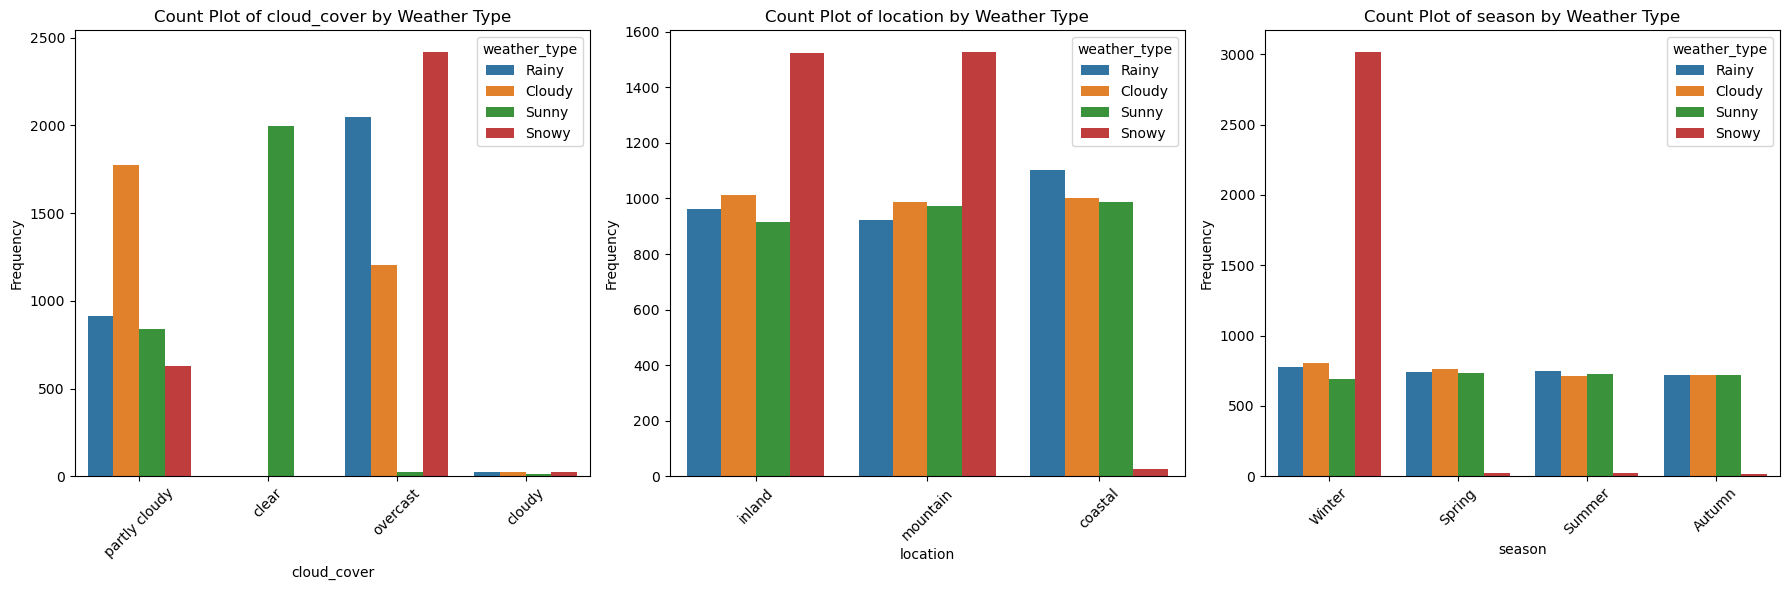

In [21]:
# Count Plot for each of the Categorical variables and checking the relationship with the Target
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, column in enumerate(columns):
    if i < len(axes):
        sns.countplot(x=column, hue='weather_type', data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {column} by Weather Type')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Summary of relationship between each Categorical Variable and Weather Type:

**Cloud Cover vs Weather Type**:
Overcast skies are strongly associated with Snowy weather, while clear skies dominate during Sunny weather. Partly cloudy and cloudy skies are more evenly distributed across weather types.

**Location vs Weather Type**:
Mountainous regions exhibit a higher frequency of Snowy weather, while other weather types (Rainy, Cloudy, Sunny) are evenly distributed across inland, mountain, and coastal regions.

**Season vs Weather Type**:
Snowy weather is dominant in winter, while other weather types (Rainy, Cloudy, Sunny) are fairly uniform across spring, summer, and autumn.

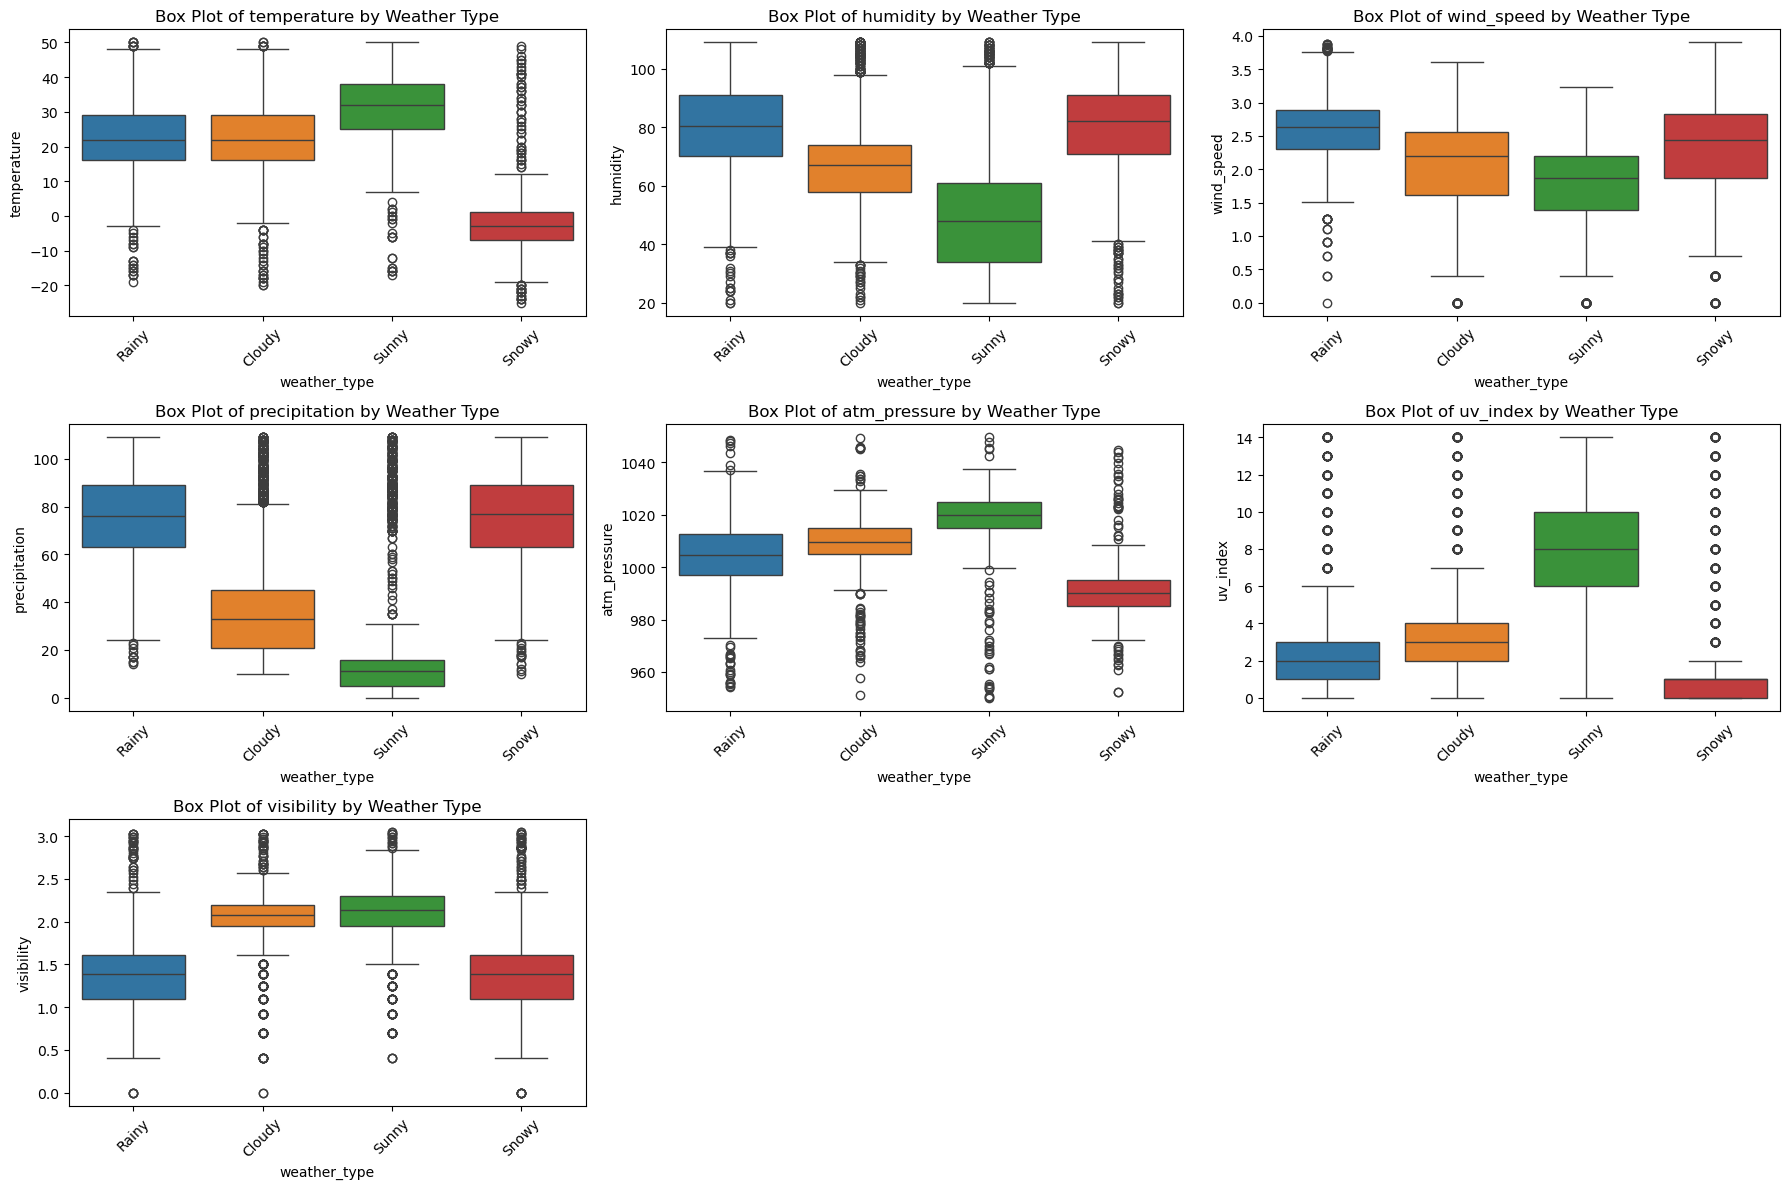

In [22]:
numerical_columns = [
    'temperature', 'humidity', 'wind_speed', 'precipitation',
    'atm_pressure', 'uv_index', 'visibility'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        data=df, x="weather_type", y=column, ax=axes[i], 
        hue="weather_type", dodge=False, palette=sns.color_palette("tab10", 4)
    )
    axes[i].set_title(f"Box Plot of {column} by Weather Type")
    axes[i].tick_params(axis='x', rotation=45)

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

#### Summary of Boxplots for the Numerical Variables by Weather Type

1. **Temperature by Weather Type**:  
   - Rainy and cloudy weather have moderate temperature ranges, while sunny weather has the highest temperatures and snowy weather the lowest.

2. **Humidity by Weather Type**:  
   - Rainy weather shows consistently high humidity levels.  
   - Cloudy and sunny weather have lower humidity, while snowy weather exhibits a wide range but generally higher values.

3. **Wind Speed by Weather Type**:  
   - Rainy weather has slightly higher wind speed variability compared to others.  
   - Wind speed across all weather types is relatively similar with few extreme values.

4. **Precipitation by Weather Type**:  
   - Rainy weather shows the highest precipitation levels with significant variability.  
   - Cloudy and sunny weather have much lower precipitation levels, while snowy weather has moderate precipitation with a narrow range.

5. **Atmospheric Pressure by Weather Type**:  
   - Sunny weather generally shows the highest atmospheric pressure.  
   - Rainy weather has the lowest pressure, with cloudy and snowy conditions falling in between.

6. **UV Index by Weather Type**:  
   - Sunny weather exhibits the highest UV index, while other weather types, particularly snowy weather, have low UV values.  
   - Cloudy and rainy conditions show minimal variability in UV index.

7. **Visibility by Weather Type**:  
   - Rainy weather has relatively lower visibility compared to other types.  
   - Cloudy and sunny weather display similar visibility patterns, with snowy conditions having the lowest median visibility.

---

<a id="data-encoding"></a>

## **2.5 Data Encoding**

In this section, we convert categorical variables into numerical formats where necessary. This is essential for some visualizations and later for machine learning models, which require numeric inputs.

In [23]:
# Getting the unique values of the 'Cloud_Cover' column
df['cloud_cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [24]:
categories = [['clear', 'partly cloudy', 'cloudy', 'overcast']]
ordinal_encoder = OrdinalEncoder(categories=categories)

df['cloud_cover'] = ordinal_encoder.fit_transform(df[['cloud_cover']])

df = df.reset_index(drop=True)

In [25]:
# Applying One-Hot Encoding to the 'Location' and 'Season' column
df_encoded = pd.get_dummies(df[['location', 'season']], prefix=['location', 'season']).astype(int)

df_encoded.head()

,location_coastal,location_inland,location_mountain,season_Autumn,season_Spring,season_Summer,season_Winter
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0
4,0,0,1,0,0,0,1


In [26]:
# Dropping one of the Columns and the orginal column to avoid multi-colinearity
data = pd.concat([df, df_encoded], axis=1).reset_index(drop=True)
data.drop(columns=['location', 'season', 'location_mountain', 'season_Summer'], inplace=True)

data

,temperature,humidity,wind_speed,precipitation,cloud_cover,atm_pressure,uv_index,visibility,weather_type,location_coastal,location_inland,season_Autumn,season_Spring,season_Winter
0,14.0,73,2.351375,82.0,1.0,1010.82,2,1.504077,Rainy,0,1,0,0,1
1,39.0,96,2.251292,71.0,1.0,1011.43,7,2.397895,Cloudy,0,1,0,1,0
2,30.0,64,2.079442,16.0,0.0,1018.72,5,1.871802,Sunny,0,0,0,1,0
3,38.0,83,0.916291,82.0,0.0,1026.25,7,0.693147,Sunny,1,0,0,1,0
4,27.0,74,2.890372,66.0,3.0,990.67,1,1.252763,Rainy,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939,29.0,62,2.639057,17.0,3.0,1002.81,2,1.791759,Cloudy,1,0,0,1,0
11940,10.0,74,2.740840,71.0,3.0,1003.15,1,0.693147,Rainy,0,0,0,0,0
11941,30.0,77,1.871802,28.0,3.0,1012.69,3,2.302585,Cloudy,1,0,1,0,0
11942,3.0,76,2.397895,94.0,3.0,984.27,0,1.098612,Snowy,0,1,0,0,1


In [27]:
# Standardize column names: lowercase and replace spaces with underscores
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

---

<a id="multivariate-analysis"></a>

## **2.6 Multivariate Analysis: Examining Interactions Among Multiple Variables**

We investigate complex interactions among three or more variables to gain deeper insights into the data structure.

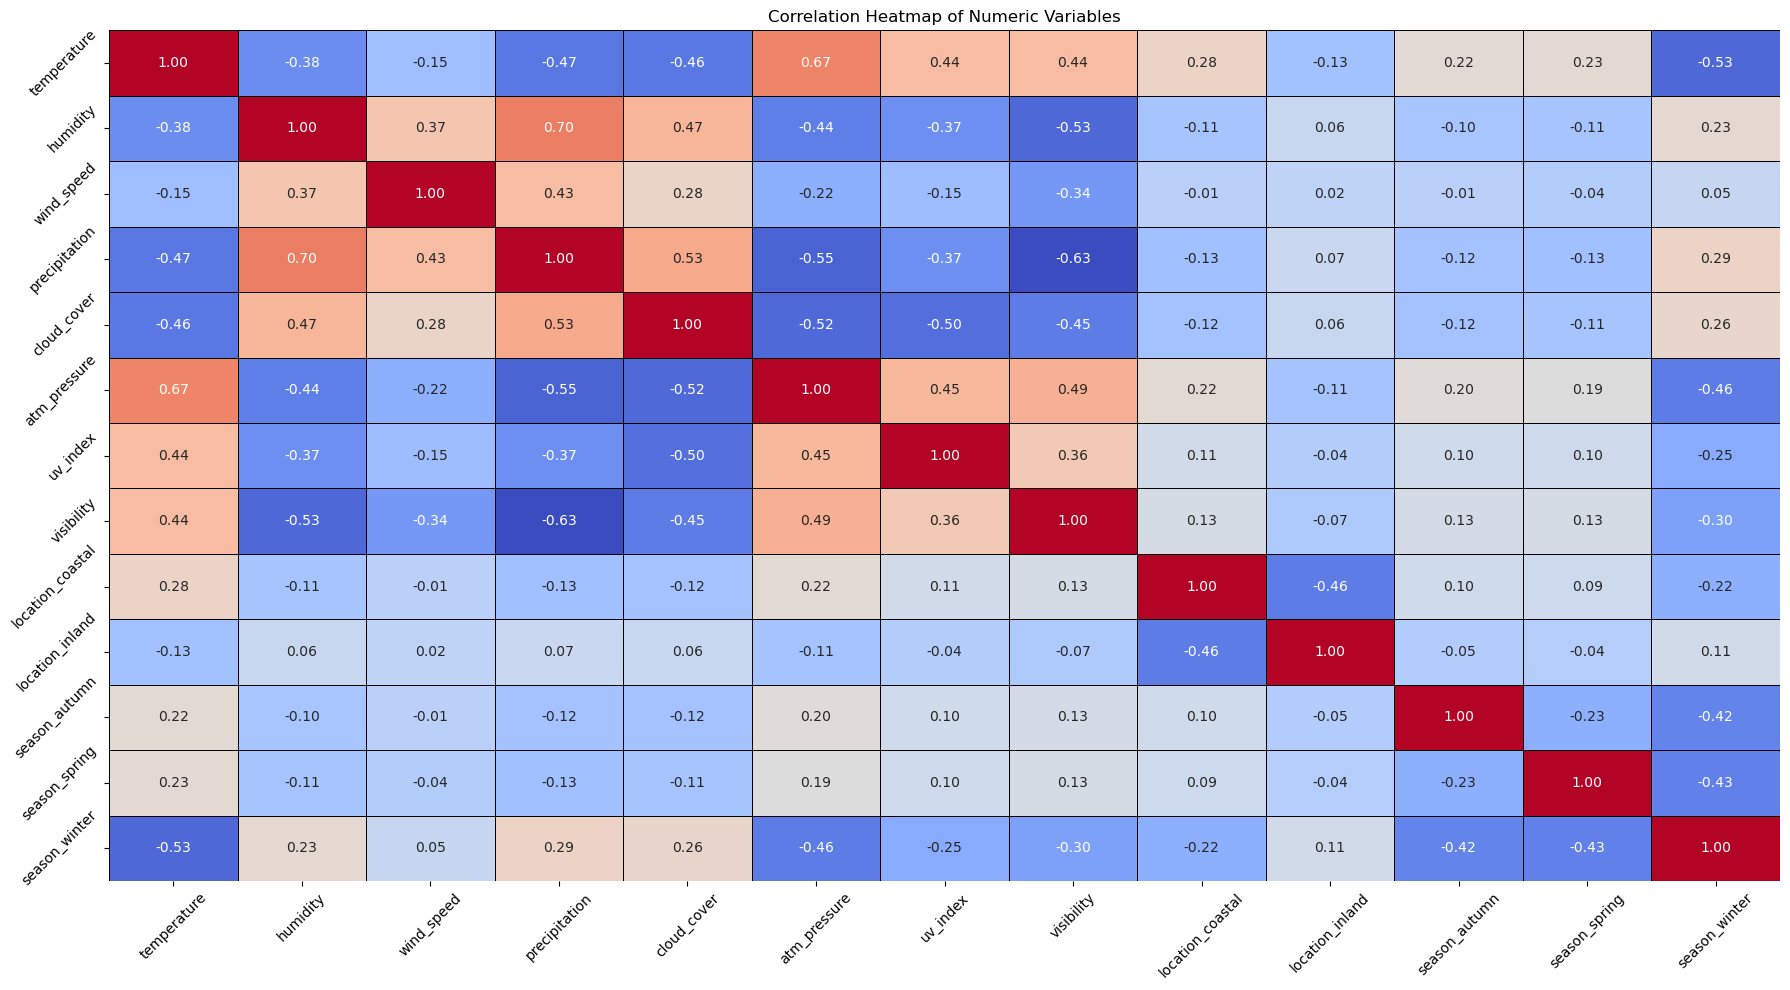

In [28]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plotting a heatmap to check the correlation of the columns
plt.figure(figsize=(18, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            cbar=False, 
            fmt='.2f',
            linewidths=0.5, 
            linecolor='black')

plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

#### From analyzing the heatmap above, here are the key observations:

1. **Strong Positive Correlations**:
   - **Temperature and Atmospheric Pressure (ATM_Pressure)**: A moderate positive correlation of 67.27%.
   - **Humidity and Precipitation**: A strong positive correlation of 69.82%.
   - **Visibility and Cloud Cover**: Moderate to strong positive correlation of 52.76%.

2. **Strong Negative Correlations**:
   - **Temperature and Season_Winter**: Strong negative correlation of -52.94%, indicating temperature decreases significantly during winter.
   - **Visibility and Cloud Cover**: A moderate negative correlation of -63.40%.
   - **Temperature and Precipitation**: Negative correlation of -46.87%, suggesting that higher temperatures are associated with less precipitation.

3. **Weak or Negligible Correlations**:
   - Several features such as **Wind Speed** and others show very low or near-zero correlations with many other variables, implying little to no linear relationship.

4. **Seasonal Effects**:
   - **Season_Winter** has strong negative correlations with Temperature (-52.94%) and strong positive correlation with Precipitation (28.83%).
   - **Season_Autumn** and **Season_Spring** are more weakly correlated with most features compared to Winter.

5. **UV Index Relationships**:
   - Moderate negative correlation with **Cloud Cover (-50.12%)**, showing that cloudier conditions reduce UV exposure.
   - Positive correlation with Temperature (43.62%), suggesting that higher temperatures coincide with stronger UV radiation.

6. **Location Effects**:
   - Coastal areas (Location_coastal) have a weak to moderate negative correlation with Cloud Cover (-12.33%) and moderate positive correlations with Visibility (13.36%).
   - Inland locations (Location_inland) show little influence on other variables, with mostly weak correlations.

#### General Insights:
- Temperature and seasonal variables are crucial for understanding weather patterns in the dataset.
- Precipitation and cloud cover significantly influence visibility and atmospheric conditions.
- The dataset exhibits distinct seasonal and locational trends in weather metrics.

In [29]:
# Dropping irrelevant or low correlation columns that are not needed for modeling
data = data.drop(columns=[
    'precipitation',
    'atm_pressure'
]).reset_index(drop=True)

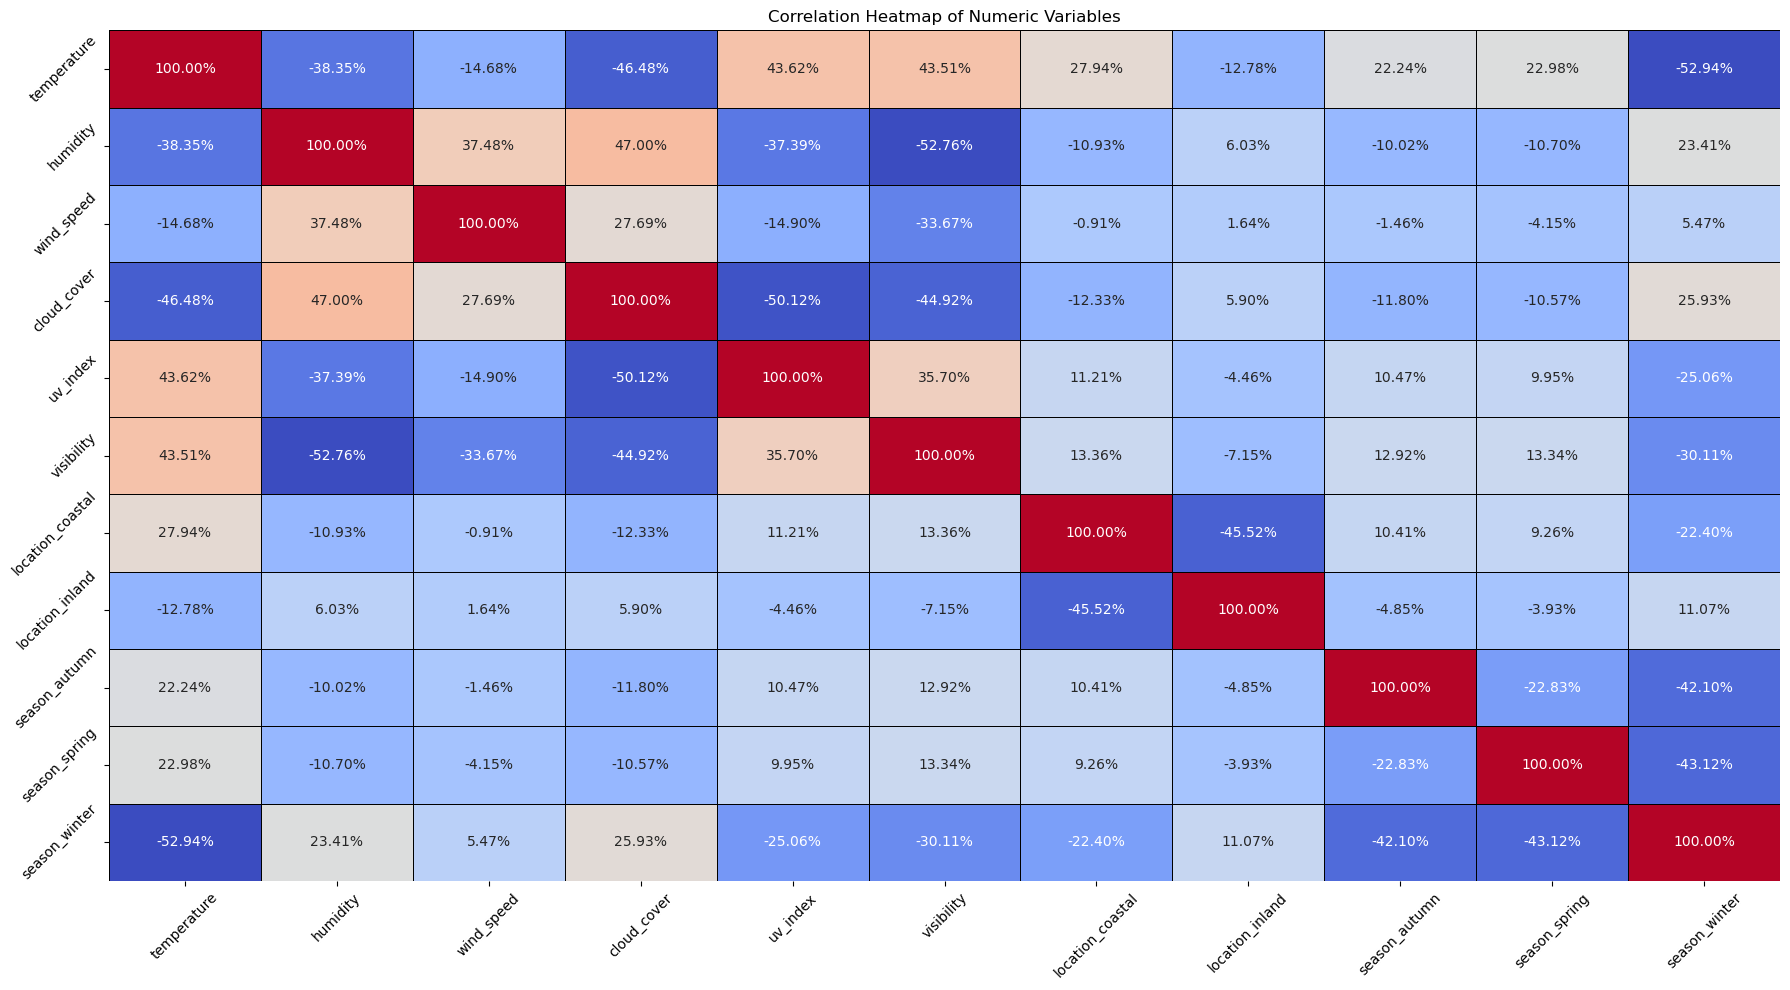

In [30]:
# Checking the dataset after removing unnecessary columns.
# These are the selected features that will be used for further analysis and modeling.
plt.figure(figsize=(18, 10))

sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    cbar=False,
    fmt='.2%',
    linewidths=0.5, 
    linecolor='black'
)

plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

---

<a id="summary"></a>

## **2.7 Summary and Key Insights**

We summarize the key findings from the visual analysis to guide the next phases of the project.

#### Categorical Variable Distributions
**Cloud Cover**: Overcast is most frequent, followed by partly cloudy. Clear is less common; cloudy is rare.  
**Location**: Inland and mountainous areas are most common; coastal areas are less frequent.  
**Season**: Winter dominates; Spring, Summer, and Autumn occur equally less often.

#### Target Variable Distribution
Weather types (Rainy, Cloudy, Sunny, Snowy) are evenly distributed with counts between 3000 and 3200.

#### Numerical Variables
**Temperature**: Symmetrical distribution, multimodal around 10°C and 30°C.  
**Humidity**: Bell-shaped, mostly 60–80%, few low outliers.  
**Wind Speed**: Right-skewed, concentrated between 5–15 units.  
**Log Wind Speed**: Near-normal after transformation.  
**Precipitation**: Bimodal around 20% and 80%, symmetric boxplot.  
**Atmospheric Pressure**: Normal-like around 1000 hPa, narrow IQR.  
**UV Index**: Skewed right, most values 0–4.  
**Visibility**: Skewed with outliers >12 km, median ~5 km.  
**Log Visibility**: More symmetric and normally distributed after transformation.

#### Categorical vs Target (Weather Type)
**Cloud Cover**: Overcast aligns with Snowy; Clear with Sunny.  
**Location**: Mountainous favors Snowy; others evenly spread.  
**Season**: Snowy weather is common in Winter; others balanced across seasons.

#### Numerical Variables by Weather Type
**Temperature**: Highest in Sunny, lowest in Snowy.  
**Humidity**: Highest in Rainy; moderate elsewhere.  
**Wind Speed**: Slightly more variable in Rainy.  
**Precipitation**: Highest in Rainy; low in Sunny.  
**Atmospheric Pressure**: Highest in Sunny; lowest in Rainy.  
**UV Index**: Peaks in Sunny; low in Snowy and Cloudy.  
**Visibility**: Lowest in Snowy and Rainy; higher in Sunny.

#### Feature Encoding
Cloud Cover encoded with OrdinalEncoder.  
Location and Season encoded with OneHotEncoder.  
Dropped one dummy column per feature to avoid multicollinearity.

#### Correlation Insights
**Positive**: Humidity–Precipitation (+69.8%), Temp–Pressure (+67.3%), Visibility–Cloud Cover (+52.8%)  
**Negative**: Temp–Season_Winter (−52.9%), Visibility–Cloud Cover (−63.4%), Temp–Precipitation (−46.9%)  
**Seasonal**: Winter lowers Temperature and increases Precipitation  
**UV Index**: Drops with Cloud Cover (−50.1%), rises with Temperature (+43.6%)  
**Location**: Coastal areas correlate positively with Visibility

#### General Insights
- Temperature, Season, and Cloud Cover are key drivers of weather conditions.
- Precipitation and Humidity are highly interrelated.
- UV Index is primarily influenced by Cloud Cover and Temperature.
- Log-transforming skewed features like Wind Speed and Visibility improved normality and model suitability.
- Distinct seasonal and locational patterns exist in the data, aiding classification tasks.

---

## **2.8 Save the Cleaned Dataset**

After completing the data cleaning and preprocessing steps, save the cleaned dataset to a CSV file for future use and reproducibility.

In [31]:
# Create a clean copy of the DataFrame for further processing and cleaning steps.
df_model = data.copy()

In [32]:
# Display the first and last few rows of the cleaned dataset to verify changes
display(df_model)

,temperature,humidity,wind_speed,cloud_cover,uv_index,visibility,weather_type,location_coastal,location_inland,season_autumn,season_spring,season_winter
0,14.0,73,2.351375,1.0,2,1.504077,Rainy,0,1,0,0,1
1,39.0,96,2.251292,1.0,7,2.397895,Cloudy,0,1,0,1,0
2,30.0,64,2.079442,0.0,5,1.871802,Sunny,0,0,0,1,0
3,38.0,83,0.916291,0.0,7,0.693147,Sunny,1,0,0,1,0
4,27.0,74,2.890372,3.0,1,1.252763,Rainy,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11939,29.0,62,2.639057,3.0,2,1.791759,Cloudy,1,0,0,1,0
11940,10.0,74,2.740840,3.0,1,0.693147,Rainy,0,0,0,0,0
11941,30.0,77,1.871802,3.0,3,2.302585,Cloudy,1,0,1,0,0
11942,3.0,76,2.397895,3.0,0,1.098612,Snowy,0,1,0,0,1


In [33]:
# Check the shape of the dataset after cleaning and feature Selecting
print("Dataset shape after cleaning:")
print(df_model.shape)

Dataset shape after cleaning:
(11944, 12)


In [34]:
# Get basic statistical summary
print("Statistical Summary:")
display(df_model.describe())

Statistical Summary:


,temperature,humidity,wind_speed,cloud_cover,uv_index,visibility,location_coastal,location_inland,season_autumn,season_spring,season_winter
count,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000,11944.000000
mean,18.119642,69.539685,2.159609,1.794625,3.680593,1.699886,0.261386,0.369307,0.182267,0.189468,0.442984
std,15.210780,19.576576,0.727296,1.205128,3.642811,0.497749,0.439408,0.482637,0.386081,0.391896,0.496759
min,-25.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,59.000000,1.791759,1.000000,1.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,70.000000,2.302585,1.000000,2.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,84.000000,2.674149,3.000000,6.000000,2.094598,1.000000,1.000000,0.000000,0.000000,1.000000
max,50.000000,109.000000,3.901973,3.000000,14.000000,3.044522,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Save numeric encoded dataset for modeling
df_model.to_csv('weather_classification_encoded.csv', index=False)